<a href="https://colab.research.google.com/github/psalms24/MySQL/blob/main/analysis_of_gun_deaths_in_the_united_states_2012_2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of gun deaths in the United States between 2012-2014

### Connecting colab to Jovian and kaggle to load dataset




In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('analysis-of-gun-deaths-in-the-united-states-2012-2014')
jovian.set_colab_id('1B0rCys2129dwe6bjk5rgGIzjGeerQ1Jf')

     |████████████████████████████████| 68 kB 3.4 MB/s 


In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
pip install opendatasets --upgrade --quiet


In [ ]:
import opendatasets as od

download_url ="https://www.kaggle.com/hakabuk/gun-deaths-in-the-us"

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adigunoluwaseun
Your Kaggle Key: ··········


100%|██████████| 715k/715k [00:00<00:00, 102MB/s]

# Background Information

This dataset includes information about gun-death in the US in the years 2012-2014.

The data includes data regarding the victim's age, sex, race, education, intent, 
time (month and year) and place of death, and whether or not police was at the place of death.

In [ ]:
data_filename = "./gun-deaths-in-the-us/guns.csv"


# Question to explore

1: How many males and females are included in this study?
 
 2: How many educated females are included in this study?
 
 3: What is the number of suicide gun deaths by gender in the United States from 2012 to 2014, by gender?
 
 4: What is the number of gun deaths by race in the United States per 100,000 people from 2012 to 2014?
 
 5: What is the number of gun deaths in the United States on average from 2012 to 2014, by cause?
 
 6: What is the percentage per 100,000 people of annual gun deaths in the United States from 2012 to 2014, by cause?
 
 7: What is the percentage of suicide gun deaths in the United States from 2012 to 2014, by year?
 
 8: How would you classify death cause by gender?
 
 9: What is the age distribution of death by gun in the US between 2012-2014?
 
 10: Which 5 locations have the highest numbers of gun death in the US between 2012-2014, and what are the leading intents in those locations?

# Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', color_codes=True)

%matplotlib inline

In [ ]:
dataset = pd.read_csv(data_filename)

## Viewing the dataset (top five rows)

In [ ]:
print(dataset.shape)
dataset.index.name = 'Index'
dataset.columns = map(str.capitalize, dataset.columns)
dataset.head(5)

(100798, 11)


,Unnamed: 0,Year,Month,Intent,Police,Sex,Age,Race,Hispanic,Place,Education
Index,,,,,,,,,,,
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


## To have an overview of the dataset

In [ ]:
dataset.describe()

,Unnamed: 0,Year,Month,Police,Age,Hispanic,Education
count,100798.000000,100798.000000,100798.000000,100798.000000,100780.000000,100798.000000,100745.000000
mean,50399.500000,2013.000357,6.567601,0.013909,43.857601,114.179607,2.296352
std,29098.020554,0.816278,3.405609,0.117114,19.496181,61.595734,0.990105
min,1.000000,2012.000000,1.000000,0.000000,0.000000,100.000000,1.000000
25%,25200.250000,2012.000000,4.000000,0.000000,27.000000,100.000000,2.000000
50%,50399.500000,2013.000000,7.000000,0.000000,42.000000,100.000000,2.000000
75%,75598.750000,2014.000000,9.000000,0.000000,58.000000,100.000000,3.000000
max,100798.000000,2014.000000,12.000000,1.000000,107.000000,998.000000,5.000000


#### Key observation from the dataset: From the age column, this data shows that at least a baby(<1) and a senior(>100) is involved in gun death in the US

## To organize the dataset by year and then by month.

In [10]:
df_Gun = dataset
df_Gun.sort_values(['Year', 'Month'], inplace=True)

## Finding the percentage of mixing data

In [11]:
missing_values = df_Gun.isna().sum().sort_values(ascending = False) / len(df_Gun)
missing_values

Place         0.013730
Education     0.000526
Age           0.000179
Intent        0.000010
Hispanic      0.000000
Race          0.000000
Sex           0.000000
Police        0.000000
Month         0.000000
Year          0.000000
Unnamed: 0    0.000000
dtype: float64

### The percentage of missing data in this dataset is too negligible for reasonable replacement. Therefore we can proceed with our analysis

## Question 1: How many males and females are included in this study?
## Answer:

In [12]:
df_Gun.Sex.value_counts(normalize=False)

M    86349
F    14449
Name: Sex, dtype: int64

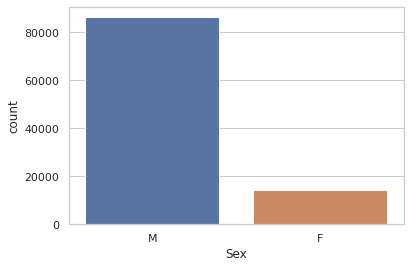

In [13]:
sns.set_style("whitegrid")
sns.countplot(x="Sex", data=df_Gun)

## Question 2: How many educated females are included in this study?
## Answer: 

In [14]:
df_byGender = df_Gun.groupby('Sex').count()
df_byGender

,Unnamed: 0,Year,Month,Intent,Police,Age,Race,Hispanic,Place,Education
Sex,,,,,,,,,,
F,14449,14449,14449,14449,14449,14446,14449,14449,14386,14430
M,86349,86349,86349,86348,86349,86334,86349,86349,85028,86315


## Question 3: What is the number of suicide gun deaths by gender in the United States from 2012 to 2014, by gender?
## Answer: 

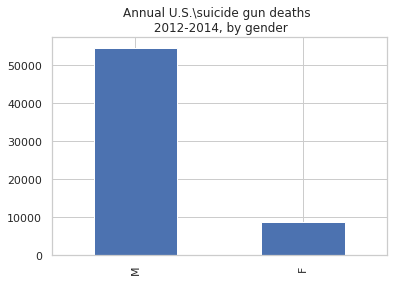

In [15]:
df_suicide_Gender =df_Gun[df_Gun["Intent"] =="Suicide"]
df_suicide_Gender.Sex.value_counts(normalize=False).plot.bar(title='Annual U.S.\\suicide gun deaths \n 2012-2014, by gender')

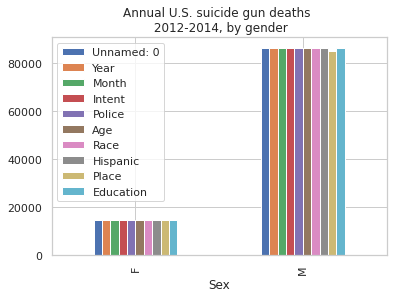

In [16]:
df_byGender = df_Gun.groupby('Sex').count()
df_byGender.plot.bar(title='Annual U.S. suicide gun deaths \n 2012-2014, by gender')

#### There are huge differences between males and females. The number of male suicides by gun is above 50,000, while the female death rate is below 10,000, which shows how males are more likely to commit suicide using a gun than females.

## Question 4: What is the number of gun deaths by race in the United States per 100,000 people from 2012 to 2014?
## Answer:

In [17]:
df_byRace = df_Gun
(df_byRace.Race.value_counts(ascending=False)*100/100000)

White                             66.237
Black                             23.296
Hispanic                           9.022
Asian/Pacific Islander             1.326
Native American/Native Alaskan     0.917
Name: Race, dtype: float64

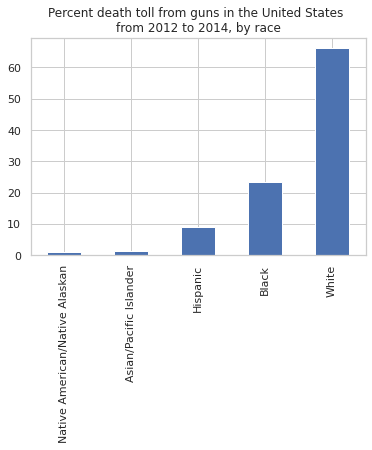

In [18]:
(df_byRace.Race.value_counts(ascending=True)*100/100000).plot.bar(title='Percent death toll from guns in the United States \nfrom 2012 to 2014, by race')

#### The highest death rate was for white people, then black, and then Hispanic. There are a few other races listed, but the rates are small comparatively.

## Question 5: What is the number of gun deaths in the United States on average from 2012 to 2014, by cause?
## Answer:

In [19]:
df_byRace.Intent.value_counts(sort =True, ascending=False)

Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
Name: Intent, dtype: int64

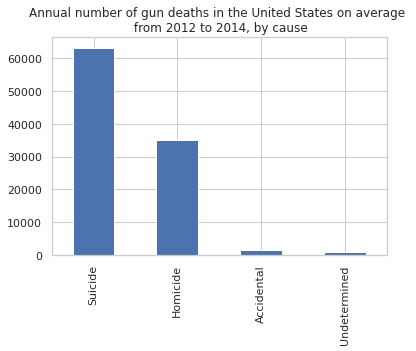

In [20]:
df_byRace.Intent.value_counts(sort=True).plot.bar(title='Annual number of gun deaths in the United States on average \n from 2012 to 2014, by cause')

## Question 6: What is the percentage per 100,000 people of annual gun deaths in the United States from 2012 to 2014, by cause?
## Answer: 

In [21]:
df_byRace.Intent.value_counts(ascending=False)*100/100000

Suicide         63.175
Homicide        35.176
Accidental       1.639
Undetermined     0.807
Name: Intent, dtype: float64

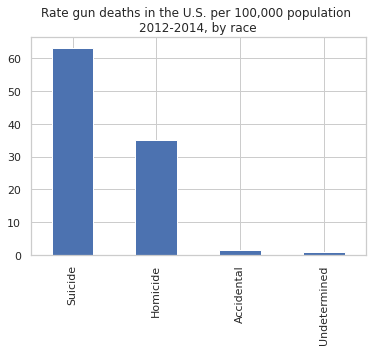

In [22]:
(df_byRace.Intent.value_counts(ascending=False)
*100/100000).plot.bar(title='Rate gun deaths in the U.S. per 100,000 population \n2012-2014, by race')

#### There are 60 suicide cases for every 100,000 people. In addition, there are 30 homicide cases for every 100,000.

## Question 7: What is the percentage of suicide gun deaths in the United States from 2012 to 2014, by year?
## Answer:

In [23]:
df_suicide=df_Gun[ df_Gun["Intent"]=="Suicide"]
df_GunSuicide= df_suicide.Year.value_counts(ascending=False) *100/100000
df_GunSuicide.sort_values(ascending=True)

2012    20.666
2013    21.175
2014    21.334
Name: Year, dtype: float64

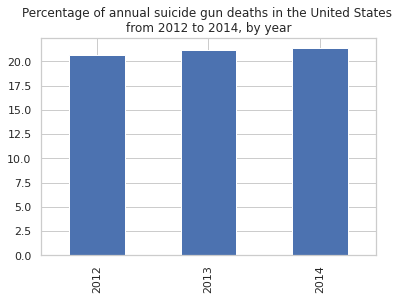

In [24]:
df_GunSuicide.sort_values(ascending=True).plot.bar(title='Percentage of annual suicide gun deaths in the United States \nfrom 2012 to 2014, by year')

#### Almost the same number of suicides each year over three years, which means that this is a regular pattern.

## Question 8: How would you classify death cause by gender?
## Answer:

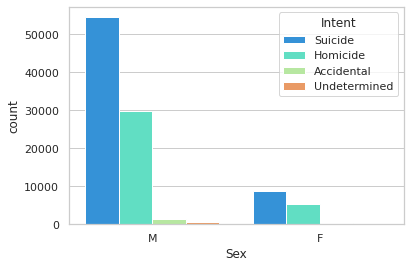

In [25]:
sns.set_style("whitegrid")
sns.countplot(x="Sex", hue="Intent", data=df_Gun, palette="rainbow")

#### The female have less than 10,000 suicide and homicide cases respectively, and less than 1,000 Accidental cases. This report shows that males are 5times more likely to commit suicide by gun in the US than Females.

## Question 9: What is the age distribution of death by gun in the US between 2012-2014?
## Answer:

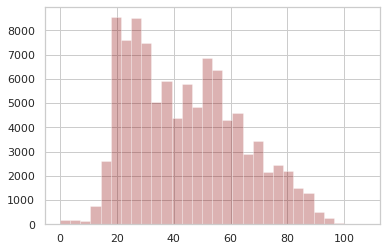

In [26]:
df_Gun["Age"].hist(bins=30, color="darkred", alpha=0.3)

#### The report shows that most deaths by gun in the US range from the teenage age(18) to the sixties(60s) 

## Question 10: Which 5 locations have the highest numbers of gun death in the US between 2012-2014, and what are the leading intents in those locations?
## Answer: 

In [27]:
df_byPlace = df_Gun
(df_byPlace.Place.value_counts(ascending=False))

Home                       60486
Other specified            13751
Street                     11151
Other unspecified           8867
Trade/service area          3439
School/instiution            671
Farm                         470
Industrial/construction      248
Residential institution      203
Sports                       128
Name: Place, dtype: int64

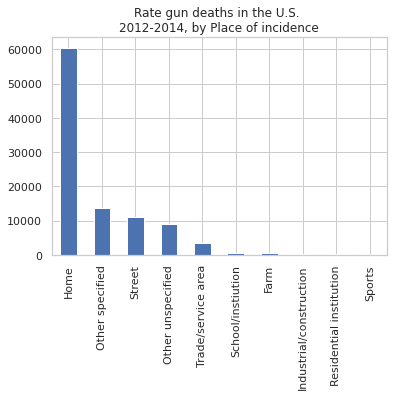

In [28]:
(df_byPlace.Place.value_counts(ascending=False)).plot.bar(title='Rate gun deaths in the U.S. \n2012-2014, by Place of incidence')

#### Home has the highest number of death by gun, followed by Other specified location, street and unspecified places.Trade and service area is 5th on the rank.

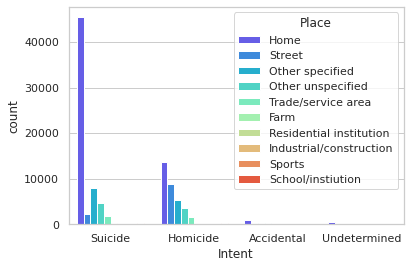

In [29]:
sns.set_style("whitegrid")
sns.countplot(x="Intent", hue="Place", data=df_Gun, palette="rainbow")

#### The report shows that most deaths by gun occurred at home (suicide was the leading intent) with over 40,000 cases followed by homicide with over 10,000 cases, then accident with over 1,000 cases. Street has a higher number of homicide cases than suicide. Street has close to 10,000 cases of homicide. Followed by other specified and unspecified locations.

## Key Insights drawn from the report

#### 1. This data shows that at least 5 babies(<=1) and seniors (>90) are involved in gun death in the US between 2012-2014.

#### 2. Male suicide gun deaths is more than 50,000, while females suicide gun deaths is below 10,000, which shows how males are more likely to commit suicide with a gun than female. It reveals that males in the US are 5times more likely to commit suicide by gun than the females.

#### 3. The highest number of deaths is for white people(almost 3times more than the black), followed by black, and then Hispanic.

#### 4. There is a high number of suicide and homicide deaths compared to a low number of deaths due to accidents.

#### 5. There are 60 suicide cases for every 100,000 people, which is not a high rate. In addition, there are 30 homicide cases for every 100,000 people.

#### 6. The analysis shows almost the same number of suicides each year over a period of three years, which means that this is like a regular pattern in US.

#### 7. The report shows that most deaths by gun in the US range from the teenage age(18) to the sixties(60s)  

#### 8. Home has the highest number of death by gun, followed by Other specified location, street and unspecified places.Trade and service area is 5th on the rank. This explains why most suicide cases occur at home, perhaps due to the privacy it provides. However, Street has the higher number of homicide cases than suicide. 


In [32]:
import jovian

In [33]:
# Execute this to save new versions of the notebook
jovian.commit(project="analysis-of-gun-deaths-in-the-united-states-2012-2014")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/oluwaseun-adigun/analysis-of-gun-deaths-in-the-united-states-2012-2014


'https://jovian.ai/oluwaseun-adigun/analysis-of-gun-deaths-in-the-united-states-2012-2014'